## 1. Провести визуализация данных в трехмерном пространстве (3D Plot). Для выборки «Iris» обосновать выбор трех измерений (сделать дополнительные исследования, например карта корреляций). Сравнить трехмерные диаграммы для выборок и сделать предварительные выводы (Исходное количество кластеров считаем неизвестным).  В отчёт включить обоснование выбора измерений (результаты исследований и вывод по ним) и графики

### Датасет Ирисы Фишера

In [2]:
from sklearn.datasets import load_iris
import numpy  as np
import pandas as pd

iris = load_iris()
data_pd = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
data_pd = data_pd.rename(columns={'sepal length (cm)': 'sl', 'sepal width (cm)': 'sw', 'petal length (cm)': 'pl', 'petal width (cm)': 'pw'})

print(data_pd)
print(data_pd.describe())

      sl   sw   pl   pw  target
0    5.1  3.5  1.4  0.2     0.0
1    4.9  3.0  1.4  0.2     0.0
2    4.7  3.2  1.3  0.2     0.0
3    4.6  3.1  1.5  0.2     0.0
4    5.0  3.6  1.4  0.2     0.0
..   ...  ...  ...  ...     ...
145  6.7  3.0  5.2  2.3     2.0
146  6.3  2.5  5.0  1.9     2.0
147  6.5  3.0  5.2  2.0     2.0
148  6.2  3.4  5.4  2.3     2.0
149  5.9  3.0  5.1  1.8     2.0

[150 rows x 5 columns]
               sl          sw          pl          pw      target
count  150.000000  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333    1.000000
std      0.828066    0.435866    1.765298    0.762238    0.819232
min      4.300000    2.000000    1.000000    0.100000    0.000000
25%      5.100000    2.800000    1.600000    0.300000    0.000000
50%      5.800000    3.000000    4.350000    1.300000    1.000000
75%      6.400000    3.300000    5.100000    1.800000    2.000000
max      7.900000    4.400000    6.900000    2.500000    2.00000

Из результатов по исследованиям в предыдущей лабораторной работе, известно, что для параметра sw имеем множество выбросов, поэтому для визуализации используем все параметры за исключением этого параметра и target. 

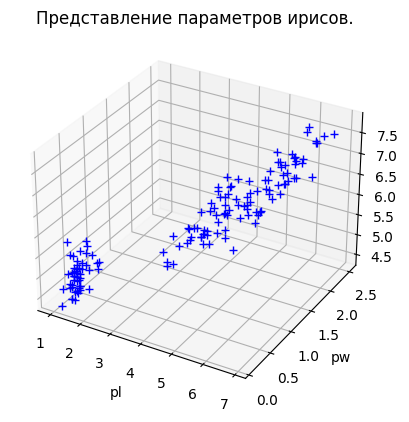

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
z = data_pd['sl']
x = data_pd['pl']
y = data_pd['pw']
ax.plot3D(x, y, z, 'b+')
ax.set_xlabel('pl')
ax.set_ylabel('pw')
ax.set_zlabel('sl')
ax.set_title('Представление параметров ирисов.')

plt.show()

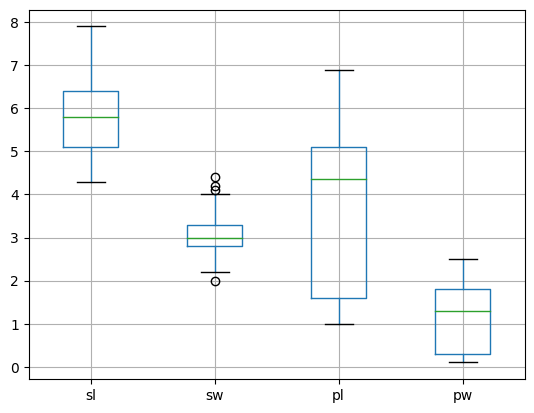

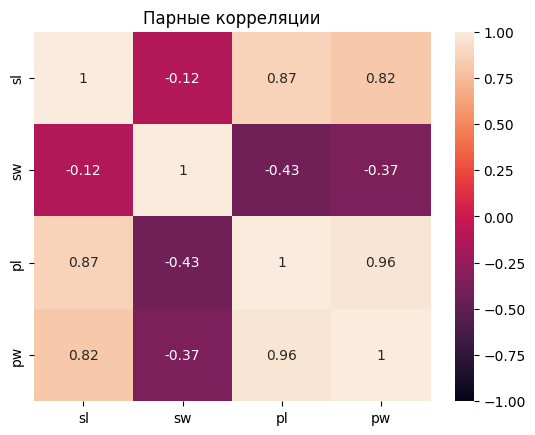

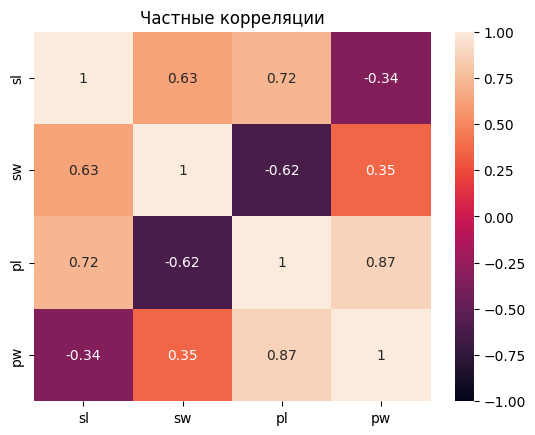

In [11]:
import seaborn as sns
import pingouin

data_x = data_pd.iloc[:,:-1]
corr_matr = data_x.corr()
pcorr_matr = data_x.pcorr()

data_x.boxplot()
plt.show()
sns.heatmap(corr_matr, annot=True, vmin=-1, vmax=1)
plt.title('Парные корреляции')
plt.show()
sns.heatmap(pcorr_matr, annot=True, vmin=-1, vmax=1)
plt.title('Частные корреляции')
plt.show()

### Датасет Бейсбол

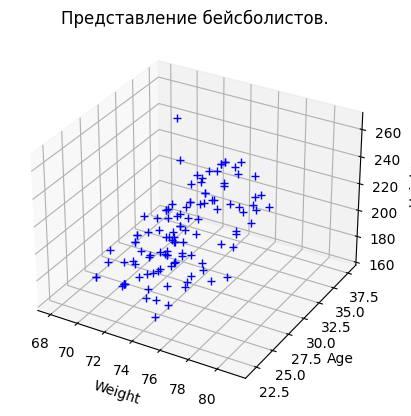

In [13]:
baseball_pd = pd.read_csv('Baseball.csv', delimiter=';', decimal=',')

ax = plt.axes(projection='3d')
z = baseball_pd['Height']
x = baseball_pd['Weight']
y = baseball_pd['Age']
ax.plot3D(x, y, z, 'b+')
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Height')
ax.set_title('Представление бейсболистов.')
plt.show()

На трёхмерном представлении параметров ирисов ярко выражены два кластера. А про данные, касающиеся бейсболистов, нельзя точно сказать о наличии отдельных кластеров. Тут данные выглядят хаотично и перемешано.

## 2.	Провести иерархическую кластеризацию. Исследовать зависимость результатов иерархической классификации от выбора меры близости (евклидово расстояние, манхэттенское расстояние, расстояние Чебышева, косинусное) и правила объеди-нения кластеров (одиночная связь, полная связь, невзвешенная средняя связь, не-взвешенная центроидная связь, метод Уорда). Проанализировать диаграмму изме-нения расстояний при объединении кластеров. Оценить предположительное число кластеров, на которое разделяется исследуемая совокупность. В отчёт включить наилучшие результаты и обосновать почему они наилучшие (сравнить с пло-хим/средним результатом). Так же включить обоснование предположительного числа кластеров.

        cluster1  cluster2  dist  number elements
step 1     101.0     142.0   0.0              2.0
step 2       7.0      39.0   0.1              2.0
step 3       0.0      17.0   0.1              2.0
step 4       9.0      34.0   0.1              2.0
step 5     128.0     132.0   0.1              2.0


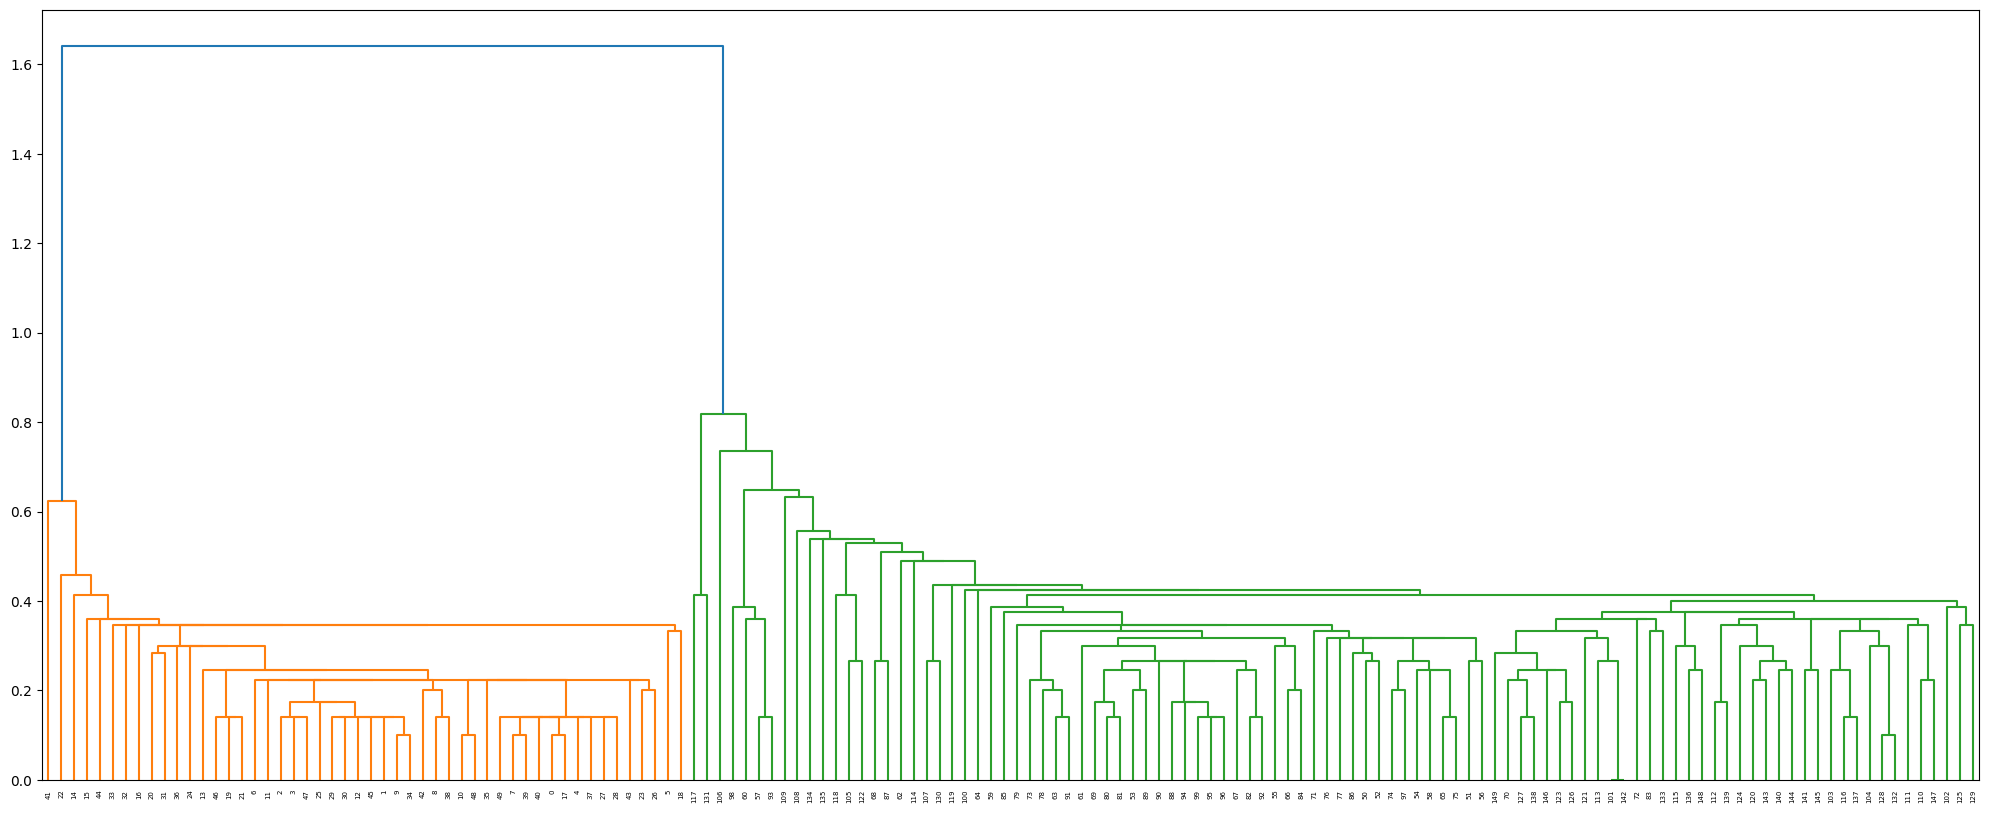

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

cluster_ar = linkage(data_x, method='single', metric='euclidean')
link_df = pd.DataFrame(cluster_ar, index=[f'step {i+1}' for i in range(cluster_ar.shape[0])], columns=['cluster1', 'cluster2', 'dist', 'number elements'] )
print(link_df.head())

fig = plt.figure(figsize=(25,10))
row_dendr = dendrogram(link_df)

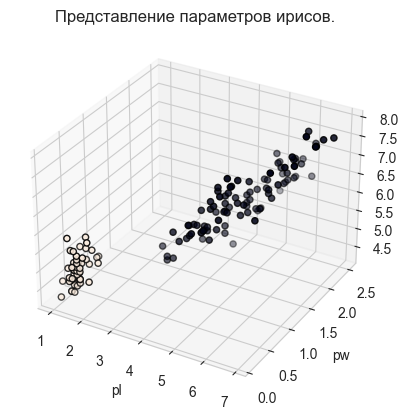

"\nfig = plt.figure(figsize=(12,12))\n\nax = Axes3D(fig)\n\nz = data_pd['sl']\nx = data_pd['pl']\ny = data_pd['pw']\n\ng = ax.scatter(x, y, z, c=labels, marker='o', cmap = sns.color_palette('hls', n_colors=2 ,as_cmap=True))\nax.set_xlabel('X Label')\nax.set_ylabel('Y Label')\nax.set_zlabel('Z Label')\nplt.show()\n"

In [45]:
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D

cl = AgglomerativeClustering(n_clusters=2, linkage='single', metric='euclidean')
labels = cl.fit_predict(data_x)


fig = plt.figure()
ax = plt.axes(projection='3d')
z = data_pd['sl']
x = data_pd['pl']
y = data_pd['pw']
ax.scatter(x, y, z, c=labels, marker='o', edgecolors=['000']*len(labels))
ax.set_xlabel('pl')
ax.set_ylabel('pw')
ax.set_zlabel('sl')
ax.set_title('Представление параметров ирисов.')

plt.show()

'''
fig = plt.figure(figsize=(12,12))

ax = Axes3D(fig)

z = data_pd['sl']
x = data_pd['pl']
y = data_pd['pw']

g = ax.scatter(x, y, z, c=labels, marker='o', cmap = sns.color_palette('hls', n_colors=2 ,as_cmap=True))
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()
'''